## K-means

In [5]:
import numpy as np
import math

# % Standard K-means clustering
# % Inputs: data, n*d data matrix with n instances and d features
# %         K, number of clusters
# % Ouputs: labels, n*1 indicator matrix with elements from 1 to K
# %         centroids, K*d centroid matrix
# %         objV, objective function value of K-means
# % Jie TANG by 04/25/2020 jietang@brandeis.edu

def myKmeans(data, K, Maxiter=50, ObjV =math.inf, threshold = 0.01):
    centroids = initializeCentroid(data, K)
    for i in range(Maxiter):
        labels, New_ObjV = assign_label(data, centroids)
        centroids = update_centroid(data, K, labels)
        if ObjV-New_ObjV > threshold:
            ObjV = New_ObjV
    return labels, centroids, ObjV

## initialize k centroids randomly
def initializeCentroid(data, K):
    return data[np.random.choice(len(data), K, replace=False)]
   
## assign labels to each point
def assign_label(data, centroids):
     return np.array([np.argmin(np.sqrt(np.sum((data[i]-centroids)**2, axis=1))) for i in range(len(data))]),\
    np.sum([np.sum((data[i]-centroids)**2) for i in range(len(data))])

## update the centroids
def update_centroid(data, K, labels):
    return np.array([np.mean(data[labels==k], axis=0) for k in range(K)])

## Testing

In [15]:
## importing packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## loading data
three_globs = pd.read_csv('three_globs.csv')
three_globs = np.array(three_globs)

In [16]:
labels, centroids, ObjV = myKmeans(three_globs, 3)

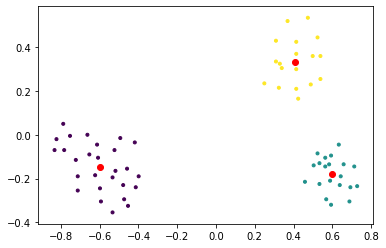

In [17]:
plt.scatter(three_globs[:, 0], three_globs[:, 1], marker='.', c = labels)
plt.scatter(centroids[:, 0], centroids[:,1], c='r')
plt.show()